In [51]:
%load_ext autoreload
%autoreload 2

from functools import partial
from copy import deepcopy

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [60]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import animation, rc
from IPython.display import HTML
from tqdm import autonotebook as tqdm

from ex1.main import Simulation
from ex1.main import read_scenario


rc('animation', html='jshtml')
%matplotlib inline

/tmp/ipykernel_72211/2785059220.py:6: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm import autonotebook as tqdm


In [62]:
scenario = read_scenario('scenario_task_3.json')
states = Simulation(scenario).get_states()

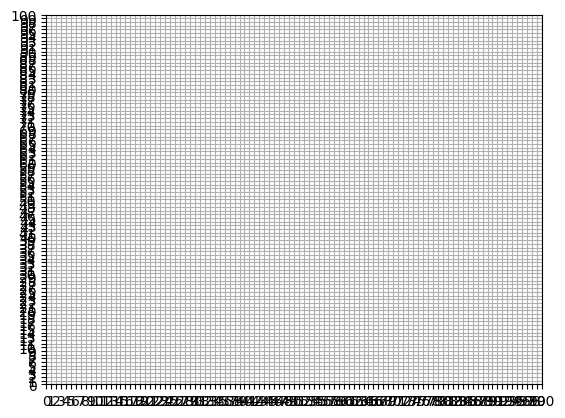

In [63]:
fig, ax = plt.subplots()
ax.set_xticks(np.arange(0, scenario.field[1] + 1, 1))
ax.set_yticks(np.arange(0, scenario.field[0] + 1, 1))
plt.grid()

ax.set_xlim((0, scenario.field[1]))
ax.set_ylim((0, scenario.field[0]))

# line, = ax.plot([], [], lw=2)
colors = ['b', 'r', 'g']
cmap = matplotlib.colors.ListedColormap(colors)
sc_plot = ax.scatter([], [], c=[], cmap=cmap)

In [66]:
offsets = []
print(len(states))
for timestamp, state in states:
    offsets.append(np.concatenate((state.pedestrians, state.obstacles, state.target)))
offsets = np.array(offsets)
offsets[..., 0], offsets[..., 1] = offsets[..., 1], offsets[..., 0].copy()
colors = np.concatenate((
    np.zeros(state.pedestrians.shape[0]),
    np.zeros(state.obstacles.shape[0]) + 1,
    np.zeros(state.target.shape[0]) + 2,
))


def init():
    sc_plot.set_offsets([[0, 0]])
    return (sc_plot,)


pbar = tqdm.tqdm(total=len(states))
def animate(i, sc_plot):
    pbar.update(1)
    sc_plot.set_offsets(offsets[i])
    sc_plot.set_array(colors)
    return (sc_plot,)


anim = animation.FuncAnimation(fig, partial(animate, sc_plot=sc_plot), init_func=init,
                               frames=len(states), interval=500, blit=True)
anim

53


  0%|          | 0/53 [00:00<?, ?it/s]

In [41]:
#HTML(anim.to_html5_video())